In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
df=pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns.has_duplicates

False

In [5]:
import sweetviz as sv
report=sv.analyze(df)
report.show_html("Report.html", open_browser=True)

AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [9]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
# Even though there is no null values in our dataset
#we need to replace the 0 in Insulin feature with the mean value in that feature
np.mean(df.Insulin)

79.79947916666667

In [11]:
# now we do the same for BMI, Skin Thickness, Glucose and Blood Pressure
np.mean(df.SkinThickness)

20.536458333333332

In [12]:
np.mean(df.BMI)

31.992578124999998

In [13]:
np.mean(df.Glucose)

120.89453125

In [14]:
np.mean(df.BloodPressure)

69.10546875

In [15]:
df.loc[(df.SkinThickness==0), ["SkinThickness"]]=27
df.loc[(df.BMI==0), ["BMI"]]=32.4
df.loc[(df.BloodPressure==0), ["BloodPressure"]]=72
df.loc[(df.Glucose==0), ["Glucose"]]=121
df.loc[(df.Insulin==0), ["Insulin"]]=119
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,119,33.6,0.627,50,1
1,1,85,66,29,119,26.6,0.351,31,0
2,8,183,64,27,119,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,27,119,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,72,27,119,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,27,119,32.4,0.232,54,1


In [16]:
cor=df.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127957,0.208615,0.065504,0.019008,0.021563,-0.033523,0.544341,0.221898
Glucose,0.127957,1.000000,0.218615,0.187604,0.417407,0.231000,0.137100,0.266591,0.492911
BloodPressure,0.208615,0.218615,1.000000,0.178544,0.039986,0.281296,-0.002378,0.324915,0.165723
SkinThickness,0.065504,0.187604,0.178544,1.000000,0.168039,0.549972,0.117429,0.102512,0.208118
Insulin,0.019008,0.417407,0.039986,0.168039,1.000000,0.182158,0.131399,0.089141,0.201016
BMI,0.021563,0.231000,0.281296,0.549972,0.182158,1.000000,0.153414,0.025548,0.311966
DiabetesPedigreeFunction,-0.033523,0.137100,-0.002378,0.117429,0.131399,0.153414,1.000000,0.033561,0.173844
Age,0.544341,0.266591,0.324915,0.102512,0.089141,0.025548,0.033561,1.000000,0.238356
Outcome,0.221898,0.492911,0.165723,0.208118,0.201016,0.311966,0.173844,0.238356,1.000000


<Axes: >

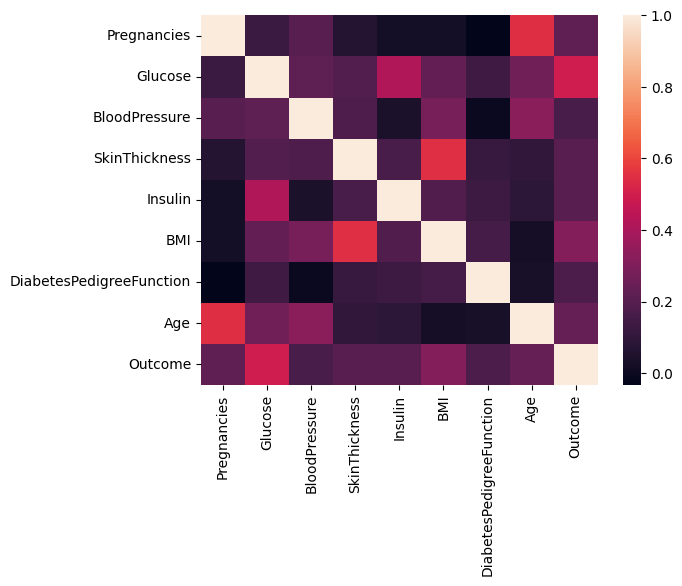

In [17]:
sb.heatmap(cor)

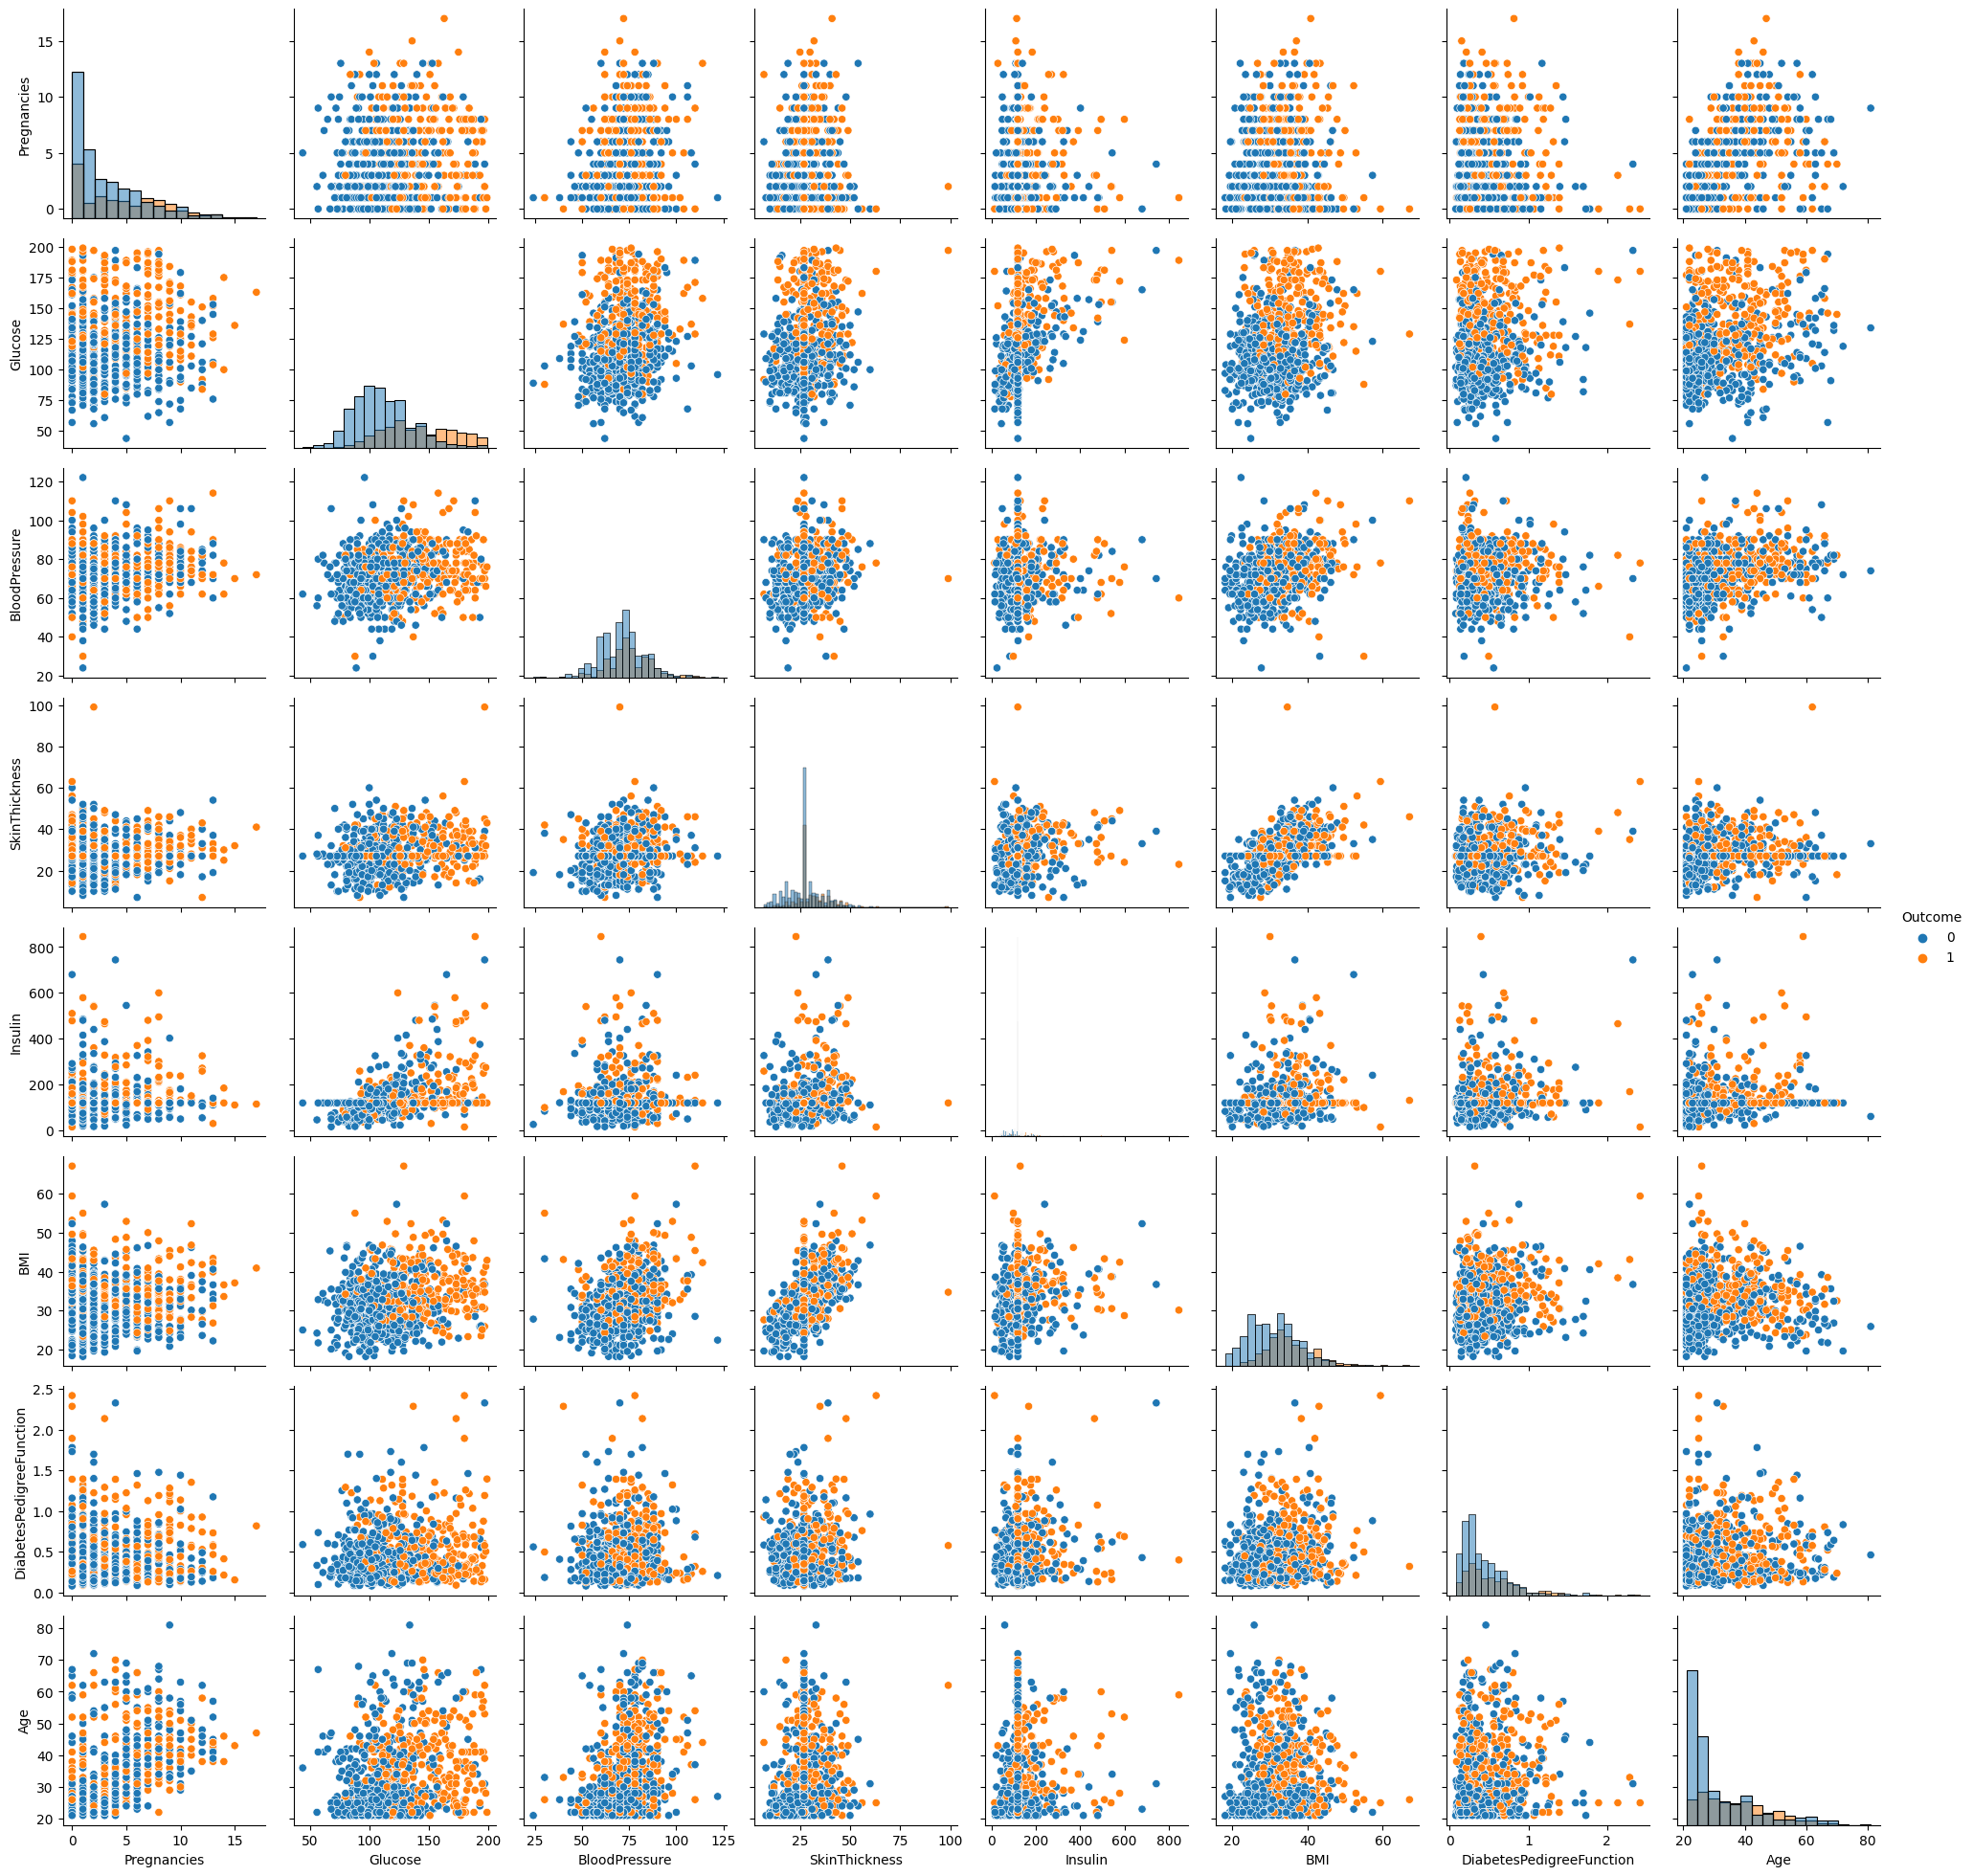

In [18]:
g=sb.PairGrid(df, hue="Outcome")
g.map_diag(sb.histplot)
g.map_offdiag(sb.scatterplot)
g.add_legend()

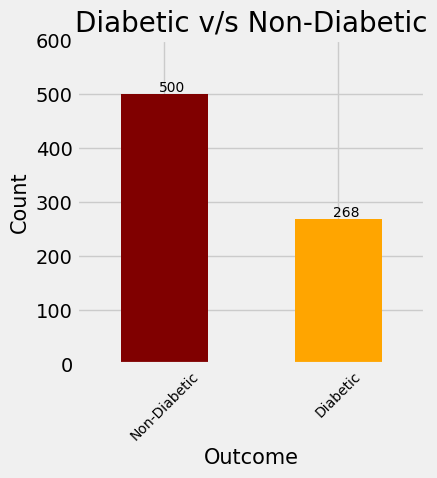

In [19]:
plt.style.use("fivethirtyeight")
outcome=df.Outcome.value_counts()
plt.figure(figsize=(4,4))
fig=outcome.plot.bar(color=["maroon", "orange"])
plt.title("Diabetic v/s Non-Diabetic", fontsize=20)
plt.xlabel("Outcome", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.ylim(0,600)
plt.xticks([0,1], ["Non-Diabetic", "Diabetic"], rotation=45, fontsize=10)
plt.annotate(outcome[0], xy=(-0.03, outcome[0]+5), fontsize=10, )
plt.annotate(outcome[1], xy=(0.97, outcome[1]+5), fontsize=10)
plt.show()

## Data Splitting

In [20]:
x=df.iloc[:, [0,1,5,7]].values
y=df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

## FeatureScaling by Z-score Normalization

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit(x_train).transform(x_train)
x_test=sc.fit(x_test).transform(x_test)

### Using Decision Tree Algorithm

>1, train: 0.721, test: 0.721
>2, train: 0.764, test: 0.766
>3, train: 0.764, test: 0.766
>4, train: 0.783, test: 0.753
>5, train: 0.808, test: 0.760
>6, train: 0.837, test: 0.766
>7, train: 0.863, test: 0.760
>8, train: 0.904, test: 0.766
>9, train: 0.932, test: 0.740
>10, train: 0.946, test: 0.760
>11, train: 0.972, test: 0.740
>12, train: 0.987, test: 0.747
>13, train: 0.998, test: 0.760
>14, train: 0.998, test: 0.714
>15, train: 1.000, test: 0.740
>16, train: 1.000, test: 0.747
>17, train: 1.000, test: 0.727
>18, train: 1.000, test: 0.721
>19, train: 1.000, test: 0.714
>20, train: 1.000, test: 0.740


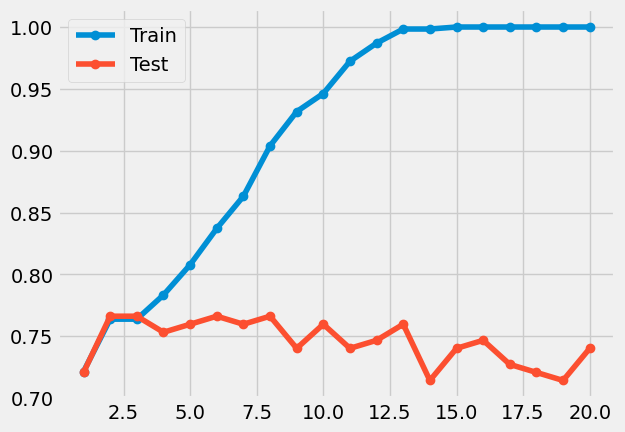

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
train_scores=[]
test_scores=[]

for i in range(1,21):
    dt = DecisionTreeClassifier(max_depth=i)
# fit model on the training dataset
    dt.fit(x_train, y_train)
# evaluate on the train dataset
    ytrain_pred = dt.predict(x_train)
    train_acc = accuracy_score(y_train, ytrain_pred)
    train_scores.append(train_acc)
# evaluate on the test dataset
    ytest_pred = dt.predict(x_test)
    test_acc = accuracy_score(y_test, ytest_pred)

    test_scores.append(test_acc)
# summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(range(1,21), train_scores, '-o', label='Train')
plt.plot(range(1,21), test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [23]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
# Now we train our model
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred_d=dt.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred_d)

0.7662337662337663

In [26]:
confusion_matrix(y_test, y_pred_d)

array([[93, 14],
       [22, 25]], dtype=int64)

In [27]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred_d)

0.23376623376623376

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [29]:
y_pred_l=log.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred_l)

0.7987012987012987

In [30]:
confusion_matrix(y_test, y_pred_l)

array([[96, 11],
       [20, 27]], dtype=int64)

In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit(x).transform(x)


In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)

cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(log, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [33]:
np.mean(scores)

0.7721161191749427

In [34]:
mae=cross_val_score(log,x,y,cv=cv,scoring='neg_mean_absolute_error')
np.mean(mae)

-0.2278838808250573

### KNN Algorithm

>1, train: 1.000, test: 0.734
>2, train: 0.842, test: 0.740
>3, train: 0.853, test: 0.812
>4, train: 0.821, test: 0.812
>5, train: 0.818, test: 0.799
>6, train: 0.798, test: 0.792
>7, train: 0.814, test: 0.786
>8, train: 0.792, test: 0.818
>9, train: 0.803, test: 0.812
>10, train: 0.792, test: 0.805
>11, train: 0.785, test: 0.805
>12, train: 0.785, test: 0.831
>13, train: 0.793, test: 0.831
>14, train: 0.792, test: 0.825
>15, train: 0.795, test: 0.825
>16, train: 0.788, test: 0.844
>17, train: 0.803, test: 0.831
>18, train: 0.801, test: 0.838
>19, train: 0.795, test: 0.825
>20, train: 0.783, test: 0.825


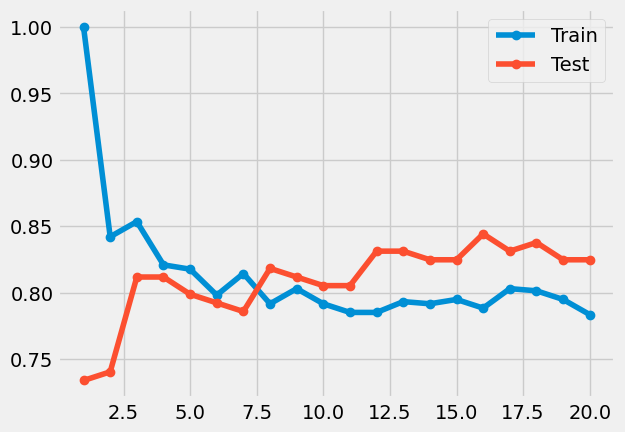

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
train_scores=[]
test_scores=[]

for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
# fit model on the training dataset
    knn.fit(x_train, y_train)
# evaluate on the train dataset
    ytrain_pred = knn.predict(x_train)
    train_acc = accuracy_score(y_train, ytrain_pred)
    train_scores.append(train_acc)
# evaluate on the test dataset
    ytest_pred = knn.predict(x_test)
    test_acc = accuracy_score(y_test, ytest_pred)

    test_scores.append(test_acc)
# summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(range(1,21), train_scores, '-o', label='Train')
plt.plot(range(1,21), test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [36]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [37]:
y_pred_k=knn.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred_k)

0.8116883116883117

In [39]:
confusion_matrix(y_test, y_pred_k)

array([[98,  9],
       [20, 27]], dtype=int64)

In [40]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred_k)

0.18831168831168832

### SVM Algorithm

In [41]:
from sklearn.svm import SVC
svc=SVC(kernel="linear", random_state=0)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [42]:
y_pred_s=svc.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred_s)

0.7987012987012987

In [43]:
confusion_matrix(y_test, y_pred_s)

array([[96, 11],
       [20, 27]], dtype=int64)

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit(x).transform(x)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold(n_splits=8, random_state=1, shuffle=True)
scores = cross_val_score(svc, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(scores)

0.7721354166666667

In [45]:
mae=cross_val_score(svc,x,y,cv=cv,scoring='neg_mean_absolute_error')
np.mean(mae)

-0.22786458333333334